In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

In [2]:

train_in = pd.read_csv('Data/train_in.csv', header=None)
train_out = pd.read_csv('Data/train_out.csv', header=None)
test_in = pd.read_csv('Data/test_in.csv', header=None)
test_out = pd.read_csv('Data/test_out.csv', header=None)

print(train_in.shape, train_out.shape, test_in.shape, test_out.shape)
print(train_in.describe())
print(train_out.value_counts())


(1707, 256) (1707, 1) (1000, 256) (1000, 1)
               0            1            2            3            4    \
count  1707.000000  1707.000000  1707.000000  1707.000000  1707.000000   
mean     -0.996921    -0.979658    -0.947076    -0.888906    -0.774433   
std       0.044630     0.152643     0.261086     0.361327     0.504587   
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
25%      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
50%      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
75%      -1.000000    -1.000000    -1.000000    -1.000000    -0.971500   
max       0.166000     0.983000     1.000000     1.000000     1.000000   

               5            6            7            8            9    ...  \
count  1707.000000  1707.000000  1707.000000  1707.000000  1707.000000  ...   
mean     -0.610117    -0.341314     0.018235    -0.001502    -0.297644  ...   
std       0.625046     0.723465     0.765371     0.7

<function matplotlib.pyplot.show(close=None, block=None)>

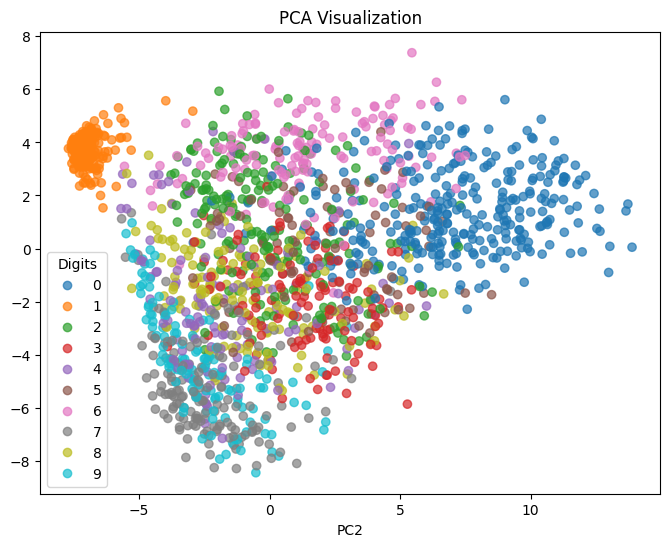

In [3]:
pca = PCA(n_components=2)
train_in_pca = pca.fit_transform(train_in)


plt.figure(figsize=(8,6))
scatter = plt.scatter(train_in_pca[:,0], train_in_pca[:,1], c=train_out[0], cmap='tab10', alpha=0.7)

plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("PCA Visualization")
plt.xlabel("PC1")
plt.xlabel("PC2")
plt.show

In [4]:
centers = {}
for digit in range(len(train_out[0].unique())):
    digit_images = train_in[train_out[0] == digit]
    center = digit_images.mean(axis=0).values
    centers[digit] = center
    
for digit in centers:
    print(digit, centers[digit].shape)

0 (256,)
1 (256,)
2 (256,)
3 (256,)
4 (256,)
5 (256,)
6 (256,)
7 (256,)
8 (256,)
9 (256,)


In [5]:
centers_matrix = np.vstack([centers[digit] for digit in sorted(centers.keys())])


test_distances = cdist(test_in.values, centers_matrix, metric='euclidean')
test_pred = np.argmin(test_distances, axis=1)
test_accuracy = np.mean(test_pred == test_out[0].values)
print(test_accuracy)


train_distances = cdist(train_in.values, centers_matrix, metric='euclidean')
train_pred = np.argmin(train_distances, axis=1)
train_accuracy = np.mean(train_pred == train_out[0].values)
print(train_accuracy)

0.804
0.8635032220269478


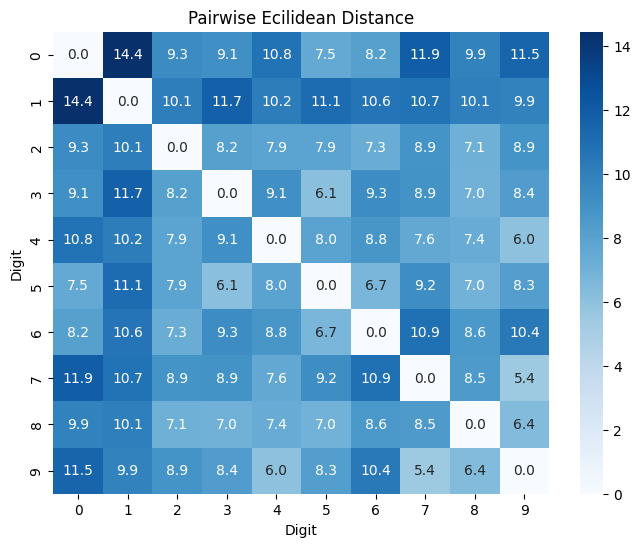

In [6]:
center_distances = cdist(centers_matrix, centers_matrix, metric='euclidean')

plt.figure(figsize=(8,6))
sns.heatmap(center_distances, annot=True, fmt=".1f", cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title("Pairwise Ecilidean Distance")
plt.xlabel("Digit")
plt.ylabel("Digit")
plt.show()

In [7]:
pairs = []
for i in range(len(centers_matrix)):
    for j in range(i+1, len(centers_matrix)):
        pairs.append((i, j, center_distances[i, j]))
        
pairs_sorted = sorted(pairs, key=lambda x: x[2])
for (i, j, dist) in pairs_sorted[:10]:
    print(f"{i}, {j} distance {dist:.2f}")

7, 9 distance 5.43
4, 9 distance 6.01
3, 5 distance 6.12
8, 9 distance 6.40
5, 6 distance 6.70
5, 8 distance 6.97
3, 8 distance 7.02
2, 8 distance 7.08
2, 6 distance 7.33
4, 8 distance 7.38


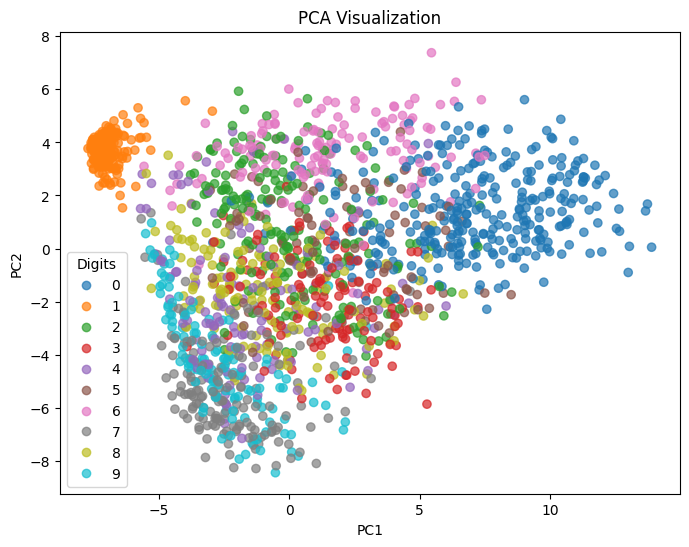

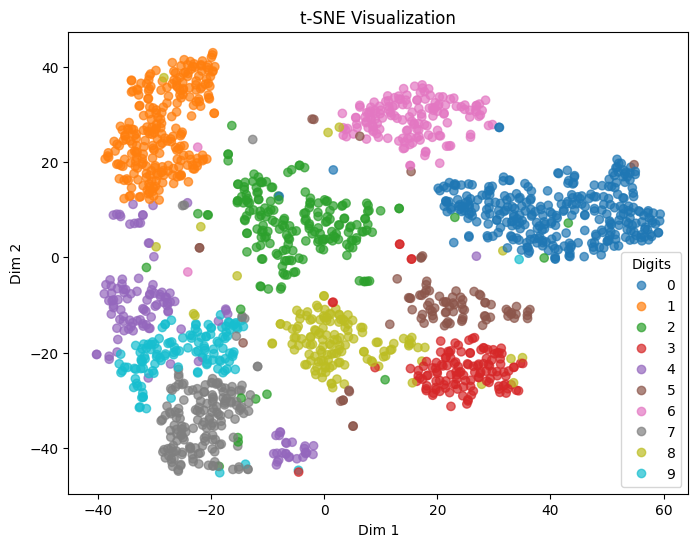

c:\Users\matis\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


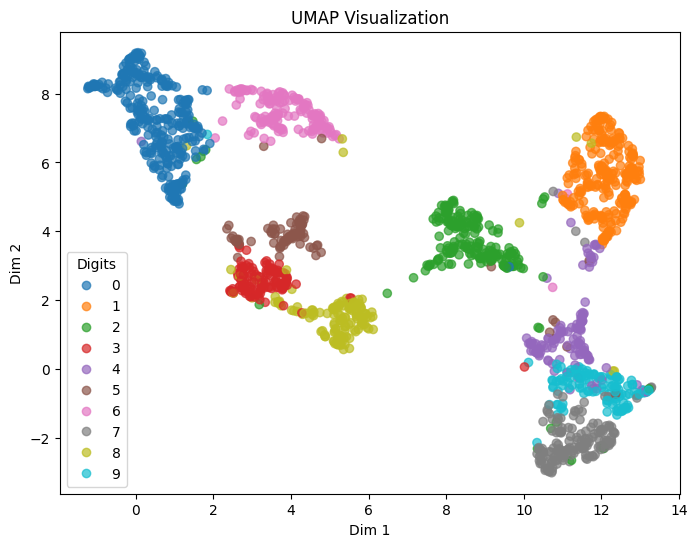

In [8]:
pca = PCA(n_components=2)
train_in_pca = pca.fit_transform(train_in)
plt.figure(figsize=(8,6))
plt.scatter(train_in_pca[:,0], train_in_pca[:,1], c=train_out[0], cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("PCA Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

tsne = TSNE(n_components=2, random_state=42)
train_in_tsne = tsne.fit_transform(train_in)
plt.figure(figsize=(8,6))
plt.scatter(train_in_tsne[:,0], train_in_tsne[:,1], c=train_out[0], cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("t-SNE Visualization")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()

umap_reducer = umap.UMAP(n_components=2, random_state=42)
train_in_umap = umap_reducer.fit_transform(train_in)
plt.figure(figsize=(8,6))
plt.scatter(train_in_umap[:,0], train_in_umap[:,1], c=train_out[0], cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("UMAP Visualization")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()

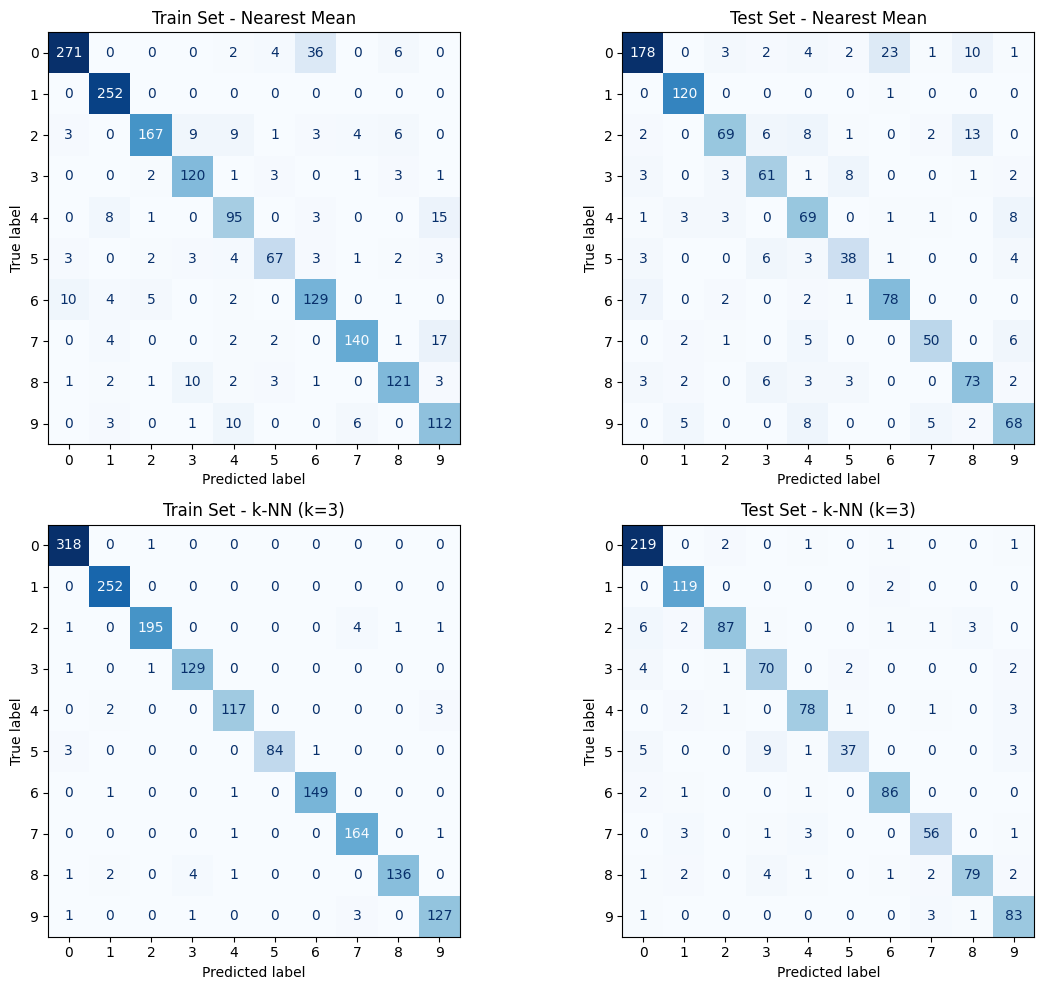

0.8635032220269478
0.804
0.9789103690685413
0.914


In [9]:
train_pred_mean = train_pred
test_pred_mean = test_pred

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_in, train_out[0].values)
train_pred_knn = knn.predict(train_in.values)
test_pred_knn = knn.predict(test_in.values)


cm_train_mean = confusion_matrix(train_out[0].values, train_pred_mean)
cm_test_mean = confusion_matrix(test_out[0].values, test_pred_mean)
cm_train_knn = confusion_matrix(train_out[0].values, train_pred_knn)
cm_test_knn = confusion_matrix(test_out[0].values, test_pred_knn)


fig, axs = plt.subplots(2, 2, figsize=(12,10))
ConfusionMatrixDisplay(cm_train_mean, display_labels=range(10)).plot(ax=axs[0,0], cmap='Blues', colorbar=False)
axs[0,0].set_title("Train Set - Nearest Mean")
ConfusionMatrixDisplay(cm_test_mean, display_labels=range(10)).plot(ax=axs[0,1], cmap='Blues', colorbar=False)
axs[0,1].set_title("Test Set - Nearest Mean")
ConfusionMatrixDisplay(cm_train_knn, display_labels=range(10)).plot(ax=axs[1,0], cmap='Blues', colorbar=False)
axs[1,0].set_title("Train Set - k-NN (k=3)")
ConfusionMatrixDisplay(cm_test_knn, display_labels=range(10)).plot(ax=axs[1,1], cmap='Blues', colorbar=False)
axs[1,1].set_title("Test Set - k-NN (k=3)")
plt.tight_layout()
plt.show()


print(train_accuracy)
print(test_accuracy)
print(np.mean(train_pred_knn == train_out[0].values))
print(np.mean(test_pred_knn == test_out[0].values))
